## Deque in Quant
### Custom Moving Average Indicator: Use a deque to maintain a rolling window of prices for quick computation of moving averages.

In [3]:
from collections import deque

# Example data: stock prices
prices = [100, 101, 102, 103, 104]
window_size = 3
rolling_window = deque(maxlen=window_size)
averages = []

for price in prices:
    rolling_window.append(price)
    averages.append(sum(rolling_window) / len(rolling_window))

print("Rolling averages:", averages)


Rolling averages: [100.0, 100.5, 101.0, 102.0, 103.0]


## Hash Map in Quant
### Storing Asset Prices by Ticker: Quickly retrieve prices for calculations like portfolio rebalancing or risk management.

In [6]:
# Example: Storing and accessing asset prices
asset_prices = {
    "AAPL": 150.25,
    "GOOGL": 2800.50,
    "AMZN": 3400.75
}

# Lookup example
ticker = "AAPL"
price = asset_prices[ticker]
print(f"Price of {ticker}: {price}")


Price of AAPL: 150.25


## Priority Queue in Quant
### Managing Order Books: Efficiently sort and process trade orders based on priority.

In [9]:
import heapq

# Example: Order book
order_book = []

# Adding orders (priority, order_id)
heapq.heappush(order_book, (1, "Order1"))  # Highest priority
heapq.heappush(order_book, (3, "Order3"))
heapq.heappush(order_book, (2, "Order2"))

# Processing orders by priority
while order_book:
    priority, order = heapq.heappop(order_book)
    print(f"Processing {order} with priority {priority}")

Processing Order1 with priority 1
Processing Order2 with priority 2
Processing Order3 with priority 3


## Graphs in Quant
### Correlation network, Visualizing it, and Identifying the most central asset

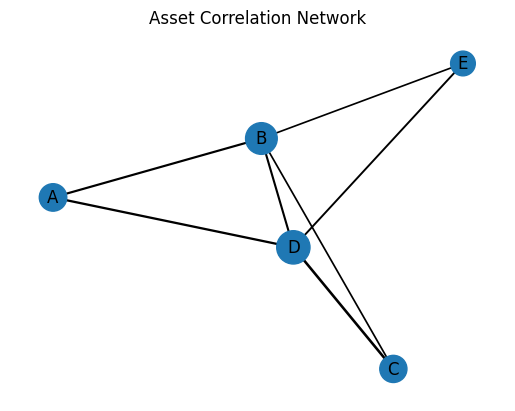

Most central asset: D


In [88]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Generate sample correlation data
assets = ['A', 'B', 'C', 'D', 'E']
correlations = np.random.rand(5, 5)
np.fill_diagonal(correlations, 1)

# Create graph
G = nx.Graph()
for i in range(len(assets)):
    for j in range(i+1, len(assets)):
        if correlations[i][j] > 0.5:  # Only add edges for strong correlations
            G.add_edge(assets[i], assets[j], weight=correlations[i][j])

# Calculate centrality
centrality = nx.eigenvector_centrality(G, weight='weight')

# Visualize
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[v * 1000 for v in centrality.values()])
nx.draw_networkx_edges(G, pos, width=[d['weight'] * 2 for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos)
plt.title("Asset Correlation Network")
plt.axis('off')
plt.show()

# Print most central asset
print(f"Most central asset: {max(centrality, key=centrality.get)}") #Since we are represnting fast changing nature of market data with a random int, we will always get different correlation networks

## Bit Manipulation and Matrices in Quant
### 

In [98]:
import numpy as np
import timeit

# Setup: Create a large sparse matrix
rows, cols = 5000, 5000
large_sparse_matrix = np.random.choice([0, 1], size=(rows, cols), p=[0.95, 0.05])

# Create bitmasks using vectorized operations
bitmasks = np.packbits(large_sparse_matrix, axis=1)

# Vectorized standard lookup
def vectorized_standard_lookup(matrix):
    return np.argwhere(matrix != 0)

# Vectorized bitwise lookup
def vectorized_bitwise_lookup(bitmasks):
    row_indices, col_indices = np.where(np.unpackbits(bitmasks, axis=1)[:, :cols] != 0)
    return np.column_stack((row_indices, col_indices))

# Measure performance
standard_time = timeit.timeit(lambda: vectorized_standard_lookup(large_sparse_matrix), number=1)
bitwise_time = timeit.timeit(lambda: vectorized_bitwise_lookup(bitmasks), number=1)

print(f"Vectorized Standard Lookup Time: {standard_time}")
print(f"Vectorized Bitwise Lookup Time: {bitwise_time}")

Vectorized Standard Lookup Time: 0.07695670000066457
Vectorized Bitwise Lookup Time: 0.06694950000019162


In [100]:
percentage_difference = (standard_time - bitwise_time) / standard_time * 100

print(f"Percentage difference: {percentage_difference:.2f}%")

Percentage difference: 13.00%
